In [13]:
import seaborn as sb
import numpy as np

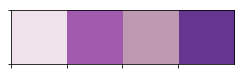

In [16]:
colors = np.array([[240.93115 , 226.61287 , 234.16437 ],
       [160.55151 ,  91.15344 , 174.69781 ],
       [190.40108 , 154.39255 , 178.69493 ],
       [100.15702 ,  53.540585, 145.55363 ]]) / 255
sb.palplot(list(colors))

In [1]:
from sklearn.cluster import KMeans
import scipy
from scipy.cluster.vq import kmeans, whiten, vq
from mpl_toolkits.mplot3d import Axes3D
# a = x_train_10
# b = a.reshape(-1, 64*64, 3)
# w = whiten(b)

# stds = np.std(b, axis=1)

# m = b.mean(axis=1)
# print(m.shape)
# b.shape

In [2]:
def get_dominant_color(img_vector, k_means=3):
    cluster_centers, distortion = kmeans(img_vector.astype(np.float32),k_means)
    vecs, dist = vq(img_vector, cluster_centers)         # assign codes
    counts, bins = scipy.histogram(vecs, len(cluster_centers))
    return cluster_centers[scipy.argmax(counts)]

In [ ]:
dominants = np.array([get_dominant_color(img) for img in b])
dominants.shape

In [ ]:
cluster_centers, _ = kmeans(dominants.astype(np.float32), 4)

vecs, dist = scipy.cluster.vq.vq(b[i], cluster_centers)         # assign codes
counts, bins = scipy.histogram(vecs, len(cluster_centers))    # count occurrences

# plt.figure(figsize=(5,2))
# plt.axis('off')
# plt.imshow((cluster_centers[scipy.argsort(counts)]/255.0).reshape(1,-1,3))

plt.figure()
plt.xticks([])
plt.bar(range(4),counts[scipy.argsort(counts)], color=(cluster_centers[scipy.argsort(counts)]/255.0))


In [ ]:
i = np.random.randint(a.shape[0]-1)

cluster_centers, distortion = kmeans(b[i].astype(np.float32), 3)

# plt.imshow((cluster_centers*stds[i]/255).reshape(1,-1,3))
plt.figure(figsize=(5,2))
plt.imshow((cluster_centers[cluster_centers.mean(axis=1).argsort()]/255.0).reshape(1,-1,3))

# plt.figure(figsize=(2,2))
# plt.imshow(m[i].reshape(1,-1,3)/255)

vecs, dist = scipy.cluster.vq.vq(b[i], cluster_centers)         # assign codes
counts, bins = scipy.histogram(vecs, len(cluster_centers))    # count occurrences

plt.figure(figsize=(2,2))
plt.imshow((cluster_centers[scipy.argmax(counts)]/255.0).reshape(1,-1,3))

plt.figure(figsize=(5,2))
plt.imshow((get_dominant_color(b[i], 3)/255.0).reshape(1,-1,3))


plt.figure(figsize=(5,5))
plt.imshow(a[i].reshape(64,64,3))
# 72, 19, 20, 99, 61, 37

i

In [ ]:
i = np.random.randint(a.shape[0]-1)

cluster_centers, distortion = kmeans(b[i].astype(np.float32), 3)

# plt.imshow((cluster_centers*stds[i]/255).reshape(1,-1,3))
plt.figure(figsize=(5,2))
plt.imshow((cluster_centers[cluster_centers.mean(axis=1).argsort()]/255.0).reshape(1,-1,3))

# plt.figure(figsize=(2,2))
# plt.imshow(m[i].reshape(1,-1,3)/255)

vecs, dist = scipy.cluster.vq.vq(b[i], cluster_centers)         # assign codes
counts, bins = scipy.histogram(vecs, len(cluster_centers))    # count occurrences

plt.figure(figsize=(2,2))
plt.imshow((cluster_centers[scipy.argmax(counts)]/255.0).reshape(1,-1,3))

plt.figure(figsize=(5,2))
plt.imshow((get_dominant_color(b[i], 3)/255.0).reshape(1,-1,3))


plt.figure(figsize=(5,5))
plt.imshow(a[i].reshape(64,64,3))
# 72, 19, 20, 99, 61, 37

i

In [ ]:
import scipy
import binascii
vecs, dist = scipy.cluster.vq.vq(b[i], cluster_centers)         # assign codes
counts, bins = scipy.histogram(vecs, len(cluster_centers))    # count occurrences

index_max = scipy.argmax(counts)                    # find most frequent
peak = cluster_centers[index_max]
colour = binascii.hexlify(bytearray(int(c) for c in peak)).decode('ascii')
print('most frequent is %s (#%s)' % (peak, colour))

In [ ]:
est = KMeans(n_clusters=3, random_state=0).fit(dominants)
fig = plt.figure(figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
labels = est.labels_

ax.scatter(dominants[:, 0], dominants[:,1], dominants[:, 2], c=labels.astype(np.float), edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
# ax.set_xlabel('Petal width')
# ax.set_ylabel('Sepal length')
# ax.set_zlabel('Petal length')
print(labels)

In [ ]:
idx = np.where(labels==0)[0]
for i in idx:
    plt.figure(figsize=(2,2))
    plt.imshow(a[i])
#     plt.
# labels[i]